In [1]:
from datetime import datetime
from matplotlib import pyplot
from matplotlib.dates import date2num
from statistics import mean

%matplotlib inline

In [2]:
# Read data

file = open('output.txt', 'r')
data = file.read()
file.close()

In [3]:
# Construct x and y arrays

x, y = [], []

for line in data.split('\n'):
    parts = line.split(';')
    if len(parts) != 2:
        continue
        
    time, temperature = parts
    
    time = date2num(datetime.fromisoformat(time))
    temperature = float(temperature)
    
    x.append(time)
    y.append(temperature)
    

In [4]:
# Optional: average y value with neighboring y values to smooth the curve.
# This operation may take a while.

width = 1000

y_avg = []
for i in range(len(x)):
    left = max(i - width, 0)
    right = min(i + width, len(x) - 1)
    y_avg.append(mean(y[left:right+1]))
    
y = y_avg

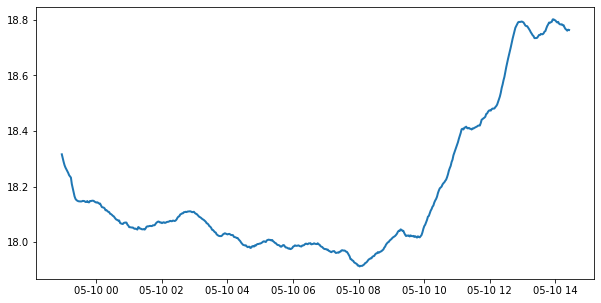

In [5]:
# Plot

figure = pyplot.figure(figsize=(10,5))
ax = figure.add_subplot(111)
ax.plot_date(x[::100], y[::100], '-', lw=2)
